In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
# import Dataset
# read data as panda dataframe
data = pd.read_csv('US_data_2019_draft_2.csv')

data.columns

Index(['Unnamed: 0', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Date', 'Month', 'Day', 'Hour',
       'Weekday', 'Time_Duration(min)'],
      dtype='object')

In [3]:
# drop unnnecessary columns
# data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop(['Unnamed: 0', 'ID', 'Source', 'TMC', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Turning_Loop'], axis=1, inplace=True)

data.columns

Index(['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Year',
       'Date', 'Month', 'Day', 'Hour', 'Weekday', 'Time_Duration(min)'],
      dtype='object')

In [4]:
# printing the dataset rows and columns
print("Dataset No. of Rows: ", data.shape[0])
print("Dataset No. of Columns: ", data.shape[1])
print("")
# printing the dataset obseravtions
print("Dataset first few rows:\n ")
print(data.head(5))

Dataset No. of Rows:  953630
Dataset No. of Columns:  30

Dataset first few rows:
 
  Severity  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0      Low            36.0           36.0         59.0         30.20   
1      Low            36.0           36.0         55.0         30.04   
2      Low            31.0           31.0         72.0         30.16   
3      Low            26.0           26.0         81.0         30.04   
4     High            32.0           27.0        100.0         29.37   

   Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
0           10.00            WNW              3.0                0.0   
1           10.00           Calm              0.0                0.0   
2           10.00           Calm              0.0                0.0   
3           10.00           Calm              0.0                0.0   
4            0.25          South              5.0                0.0   

  Weather_Condition  ...  Traffic_Calming  Traffic

In [ ]:
# printing the struture of the dataset
print("Dataset info:\n ")
print(data.info())

In [ ]:
# printing the summary statistics of the dataset
print(data.describe(include='all'))

In [5]:
# Missing Values
print("Sum of NULL values in each column. ")
print(data.isnull().sum())

Sum of NULL values in each column. 
Severity                0
Temperature(F)          0
Wind_Chill(F)           0
Humidity(%)             0
Pressure(in)            0
Visibility(mi)          0
Wind_Direction        293
Wind_Speed(mph)         0
Precipitation(in)       5
Weather_Condition     352
Amenity                 0
Bump                    0
Crossing                0
Give_Way                0
Junction                0
No_Exit                 0
Railway                 0
Roundabout              0
Station                 0
Stop                    0
Traffic_Calming         0
Traffic_Signal          0
Sunrise_Sunset         22
Year                    0
Date                    0
Month                   0
Day                     0
Hour                    0
Weekday                 0
Time_Duration(min)      0
dtype: int64


In [6]:
# drop unnnecessary columns
data.drop(['Wind_Direction', 'Weather_Condition'], axis=1, inplace=True)

data.columns

Index(['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Year', 'Date',
       'Month', 'Day', 'Hour', 'Weekday', 'Time_Duration(min)'],
      dtype='object')

In [7]:
#data['Severity'] = data['Severity'].apply(lambda x:'0' if x<=2 else '1')
severity_freq = data.groupby('Severity').Severity.count()
print(severity_freq)
print()

for c in data.iloc[:, 8:21].columns:
    freq = data.groupby(c)[c].count()
    print(freq)
    print()

Severity
High    265855
Low     687775
Name: Severity, dtype: int64

Amenity
False    943263
True      10367
Name: Amenity, dtype: int64

Bump
False    953447
True        183
Name: Bump, dtype: int64

Crossing
False    887135
True      66495
Name: Crossing, dtype: int64

Give_Way
False    951103
True       2527
Name: Give_Way, dtype: int64

Junction
False    887095
True      66535
Name: Junction, dtype: int64

No_Exit
False    952510
True       1120
Name: No_Exit, dtype: int64

Railway
False    945326
True       8304
Name: Railway, dtype: int64

Roundabout
False    953577
True         53
Name: Roundabout, dtype: int64

Station
False    936929
True      16701
Name: Station, dtype: int64

Stop
False    939977
True      13653
Name: Stop, dtype: int64

Traffic_Calming
False    953250
True        380
Name: Traffic_Calming, dtype: int64

Traffic_Signal
False    800331
True     153299
Name: Traffic_Signal, dtype: int64

Sunrise_Sunset
Day      697016
Night    256592
Name: Sunrise_Sunset, dtyp

In [8]:
data = data.dropna()

In [12]:
# Recode X variables
data.iloc[:, 8:20] = data.iloc[:, 8:20].replace({True:"1", False:"0"})
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].replace({"Day":"1", "Night":"0"})
print(data.head())

  Severity  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0      Low            36.0           36.0         59.0         30.20   
1      Low            36.0           36.0         55.0         30.04   
2      Low            31.0           31.0         72.0         30.16   
3      Low            26.0           26.0         81.0         30.04   
4     High            32.0           27.0        100.0         29.37   

   Visibility(mi)  Wind_Speed(mph)  Precipitation(in) Amenity Bump  ...  \
0           10.00              3.0                0.0       0    0  ...   
1           10.00              0.0                0.0       0    0  ...   
2           10.00              0.0                0.0       0    0  ...   
3           10.00              0.0                0.0       0    0  ...   
4            0.25              5.0                0.0       0    0  ...   

  Traffic_Calming Traffic_Signal Sunrise_Sunset  Year        Date Month Day  \
0               0              0     

In [13]:

Y = data.values[:, 0]
X = data.values[:, 1:22]


In [14]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [15]:
# perform training with random forest with all columns
# specify random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# perform training
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

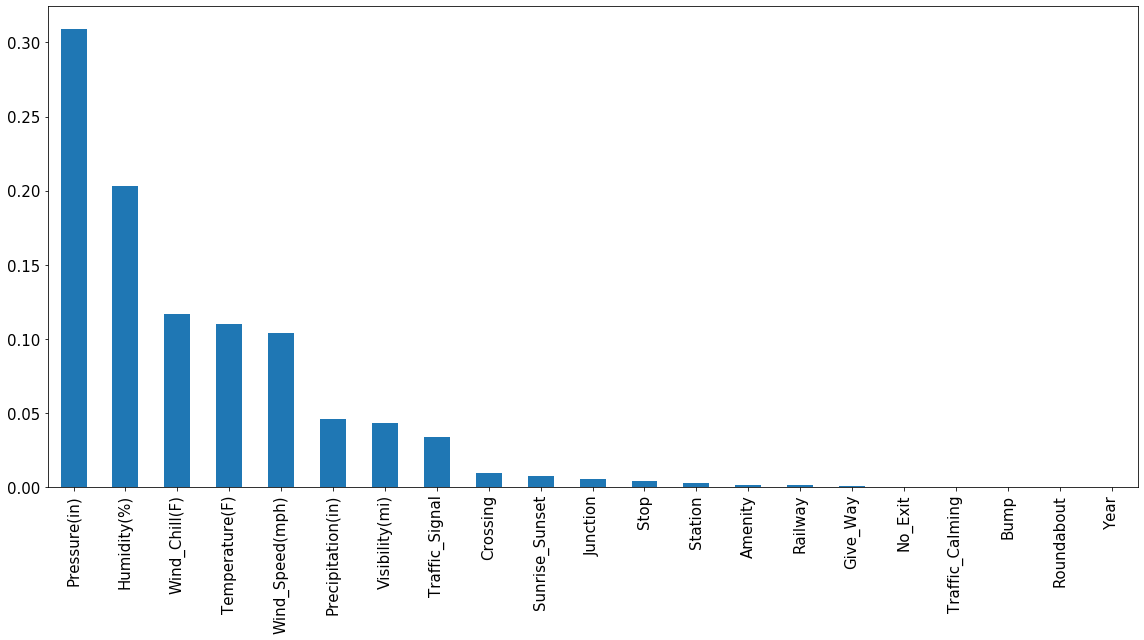

In [17]:
# plot feature importances
# get feature importances
importances = clf.feature_importances_

# convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, data.iloc[:, 1:22].columns)

# sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# make the bar Plot from f_importances
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16, 9), rot=90, fontsize=15)

# show the plot
plt.tight_layout()
plt.show()

In [18]:
# select features to perform training with random forest with k columns
# select the training dataset on k-features
newX_train = X_train[:, clf.feature_importances_.argsort()[::-1][:10]]

# select the testing dataset on k-features
newX_test = X_test[:, clf.feature_importances_.argsort()[::-1][:10]]

In [25]:
# perform training with random forest with k columns
# specify random forest classifier
# n_estimators=100: The number of trees in the forest.
# bootstrap: boolean, optional (default=True)
clf_k_features = RandomForestClassifier(n_estimators=1000)

# train the model
clf_k_features.fit(newX_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
# make predictions

# predicton on test using all features
y_pred = clf.predict(X_test)
y_pred_score = clf.predict_proba(X_test)

# prediction on test using k features
y_pred_k_features = clf_k_features.predict(newX_test)
y_pred_k_features_score = clf_k_features.predict_proba(newX_test)

In [21]:
# calculate metrics gini model

print("\n")
print("Results Using All Features: \n")

print("Classification Report: ")
print(classification_report(y_test,y_pred))
print("\n")

print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")

print("ROC_AUC : ", roc_auc_score(y_test,y_pred_score[:,1]) * 100)

# calculate metrics entropy model
print("\n")
print("Results Using K features: \n")
print("Classification Report: ")
print(classification_report(y_test,y_pred_k_features))
print("\n")
print("Accuracy : ", accuracy_score(y_test, y_pred_k_features) * 100)
print("\n")
print("ROC_AUC : ", roc_auc_score(y_test,y_pred_k_features_score[:,1]) * 100)



Results Using All Features: 

Classification Report: 
              precision    recall  f1-score   support

        High       0.50      0.32      0.39     80076
         Low       0.77      0.88      0.82    206005

    accuracy                           0.72    286081
   macro avg       0.64      0.60      0.61    286081
weighted avg       0.69      0.72      0.70    286081



Accuracy :  72.17885843519842


ROC_AUC :  70.1172986231028


Results Using K features: 

Classification Report: 
              precision    recall  f1-score   support

        High       0.50      0.33      0.40     80076
         Low       0.77      0.88      0.82    206005

    accuracy                           0.72    286081
   macro avg       0.64      0.60      0.61    286081
weighted avg       0.70      0.72      0.70    286081



Accuracy :  72.17955753790011


ROC_AUC :  69.79916388355602


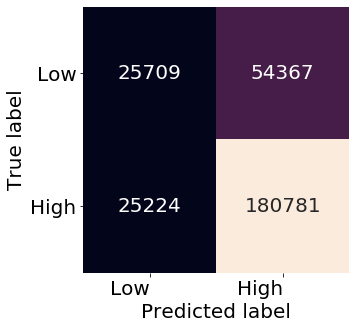

In [22]:
# confusion matrix for gini model
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = data['Severity'].unique()


df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))

hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)

hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
# Show heat map
plt.tight_layout()

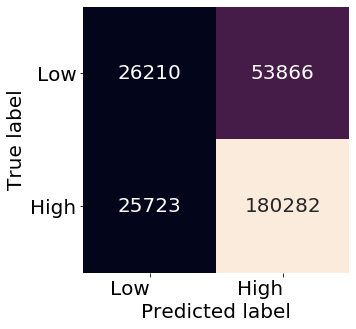

In [23]:
# confusion matrix for entropy model

conf_matrix = confusion_matrix(y_test, y_pred_k_features)
class_names = data['Severity'].unique()


df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))

hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)

hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
# Show heat map
plt.tight_layout()
plt.show()

In [24]:
data.to_csv('df_new.csv')